In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('pastel')
sns.set_context("notebook")

plt.rc("font", size=12, family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

## Walmart 데이터셋
- https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

## Potential Usecases

1. Customer Segmentation
2. Market Basket Analysis
3. Personalized Marketing
4. Demand Forecasting
5. Product Recommendation Systems
6. Customer Lifetime Value (CLV) Analysis
7. Sales and Revenue Analysis
8. Urban vs. Rural Analysis
9. Occupational Influence on Purchases
10. Customer Loyalty Programs
11. Marital Status and Shopping Behavior
12. Price Sensitivity Analysis
13. Optimizing pricing strategies to maximize sales and profitability

## 1. Customer Segmentation

## 열 정리
1. User_ID: User ID
2. Product_ID: Product ID
3. Gender: Sex of User
4. Age: Age in bins
5. Occupation: Occupation(Masked)
6. City_Category: Category of the City (A,B,C)
7. Stay_In_Current_City_Years: Number of years stay in current city
8. Marital_Status: Marital Status
9. Product_Category: Product Category (Masked)
10. Purchase: Purchase Amount

In [3]:
df = pd.read_csv('./data/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## 기술통계

## 결측치 확인

In [10]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## 칼럼 분석

In [12]:
df['User_ID'].nunique()

5891

In [15]:
df['Product_ID'].nunique()

3631

In [17]:
df['Age'].nunique()

7

In [44]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [19]:
df['Occupation'].nunique()

21

In [46]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [30]:
df['Product_Category'].nunique()

20

In [73]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [33]:
df['Purchase'].nunique()

18105

## 분석에 필요하지 않은 열 제외
### 고객 세분화는 일반적으로 고객의 행동(예: 구매 패턴, 선호도)이나 특성(예: 성별, 나이, 도시 카테고리 등)을 기반으로 이루어지지만, User_ID, Product_ID는 그런 정보를 제공하지 않으므로 불필요

In [5]:
df = df.drop(columns=['User_ID','Product_ID'])

## 인코딩
1. 명목형 : Gender, City_Category
2. 순서형 : Age, Stay_In_Current_City_Years

In [7]:
age_mapping = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

df['Age'] = df['Age'].replace(age_mapping).astype(int)

stay_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4
}

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(stay_mapping).astype(int)

C:\Users\jisu\AppData\Local\Temp\ipykernel_19184\3837676746.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace(age_mapping).astype(int)
C:\Users\jisu\AppData\Local\Temp\ipykernel_19184\3837676746.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(stay_mapping).astype(int)


In [9]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,F,0,10,A,2,0,3,8370
1,F,0,10,A,2,0,1,15200
2,F,0,10,A,2,0,12,1422
3,F,0,10,A,2,0,12,1057
4,M,6,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,5,13,B,1,1,20,368
550064,F,2,1,C,3,0,20,371
550065,F,2,15,B,4,1,20,137
550066,F,6,1,C,2,0,20,365


In [11]:
df_encoded = pd.get_dummies(data=df,
                              columns=['Gender', 'City_Category'],
                              drop_first=False)

In [13]:
bool_cols = df_encoded.columns.difference(['User_ID', 'Product_ID'])
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [15]:
df_encoded

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,0,10,2,0,3,8370,1,0,1,0,0
1,0,10,2,0,1,15200,1,0,1,0,0
2,0,10,2,0,12,1422,1,0,1,0,0
3,0,10,2,0,12,1057,1,0,1,0,0
4,6,16,4,0,8,7969,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,5,13,1,1,20,368,0,1,0,1,0
550064,2,1,3,0,20,371,1,0,0,0,1
550065,2,15,4,1,20,137,1,0,0,1,0
550066,6,1,2,0,20,365,1,0,0,0,1


## 시각화

## 수치형변수

## Purchase
### 평균이 중앙값보다 크다. -> 데이터의 분포가 비대칭적

In [39]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

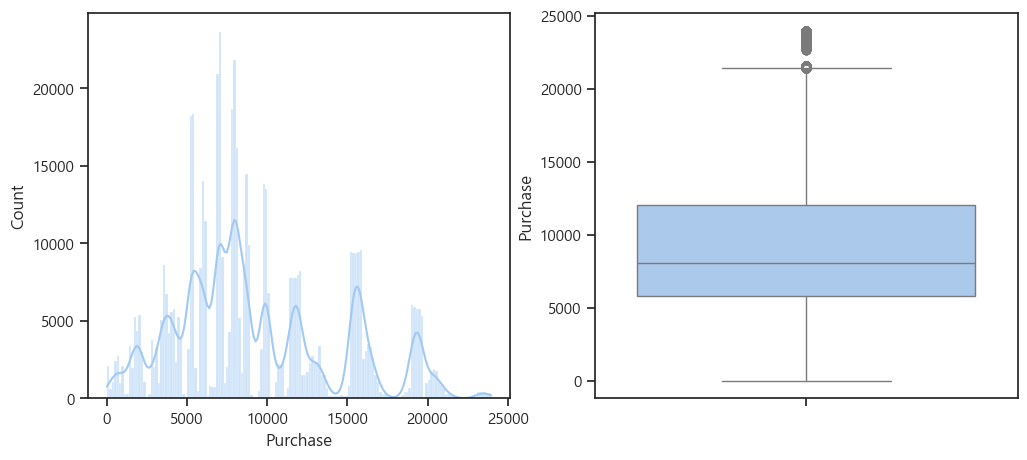

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=df, x='Purchase', kde=True, ax=ax[0])
sns.boxplot(data=df, y='Purchase', ax=ax[1])

plt.show()

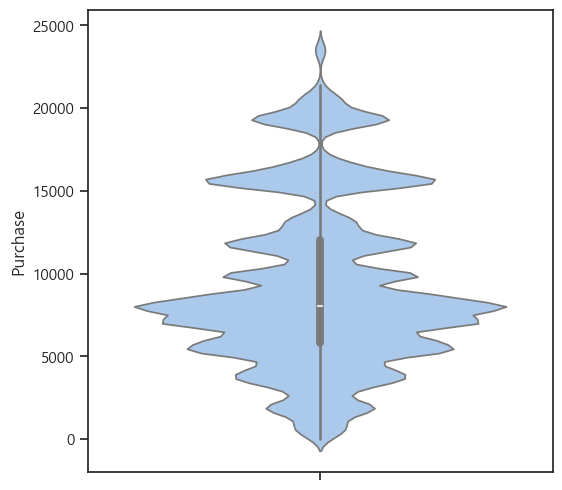

In [18]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sns.violinplot(data=df, y='Purchase')

plt.show()

## Purchase의 이상치 파악
### 0.48% 정도의 이상치

In [65]:
def outlier(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75) 
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR  
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

outliers = outlier(df['Purchase'])
print("이상치 개수:", outliers.shape[0])
print("이상치 비율:", outliers.shape[0] / len(df) * 100, '%')
print("이상치 데이터:\n", outliers)

이상치 개수: 2677
이상치 비율: 0.4866671029763593 %
이상치 데이터:
 343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64


## 범주형 변수
### Gender : 고객 중 남자가 여자보다 2배이상 데이터가 더 많음
### Age : 고객 중 26~35살이 압도적으로 많음
### Occupation
### City_Category
### Stay_In_Current_City_Years : 고객 중 도시에 2년동안 머문 사람들이 가장 많음
### Marital_Status : 고객 중 결혼을 안한 사람이 더 많음
### Product_Category : 특정 상품에 대한 구매율이 높음

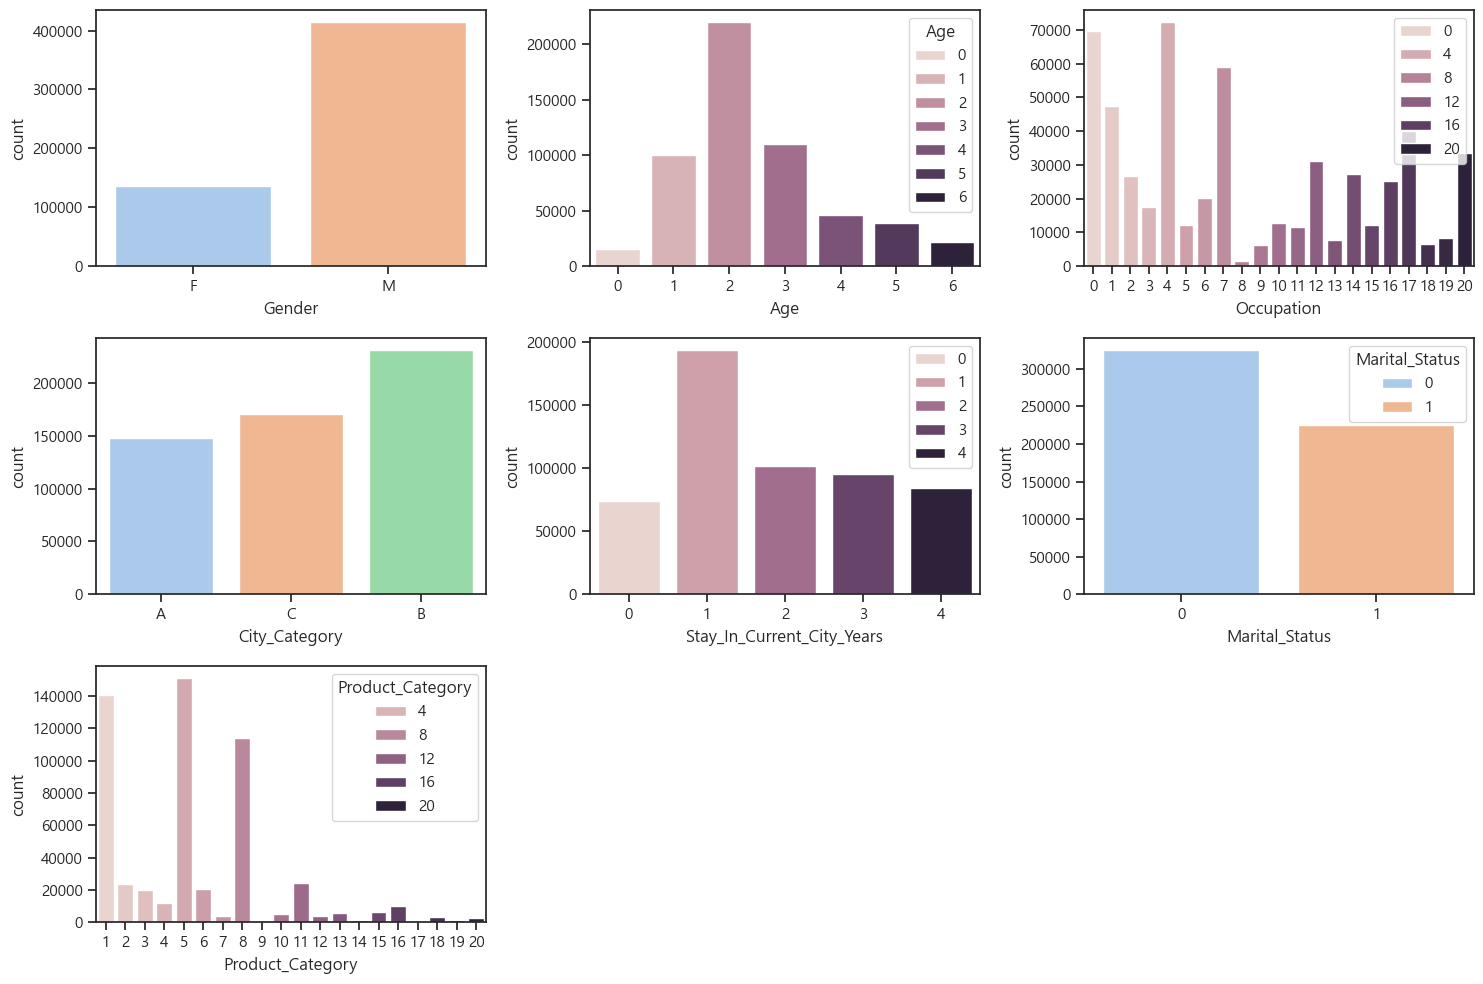

In [243]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data=df, x='Gender', hue='Gender', ax=ax[0, 0])  
sns.countplot(data=df, x='Age', hue='Age', ax=ax[0, 1])  
sns.countplot(data=df, x='Occupation', hue='Occupation', ax=ax[0, 2])  
ax[0, 2].legend(loc='upper right')
sns.countplot(data=df, x='City_Category', hue='City_Category', ax=ax[1, 0])  
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Stay_In_Current_City_Years', ax=ax[1, 1])
ax[1, 1].legend(loc='upper right')
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', ax=ax[1, 2])  
sns.countplot(data=df, x='Product_Category', hue='Product_Category', ax=ax[2, 0])  

fig.delaxes(ax[2, 1])  
fig.delaxes(ax[2, 2]) 

plt.tight_layout()
plt.show()

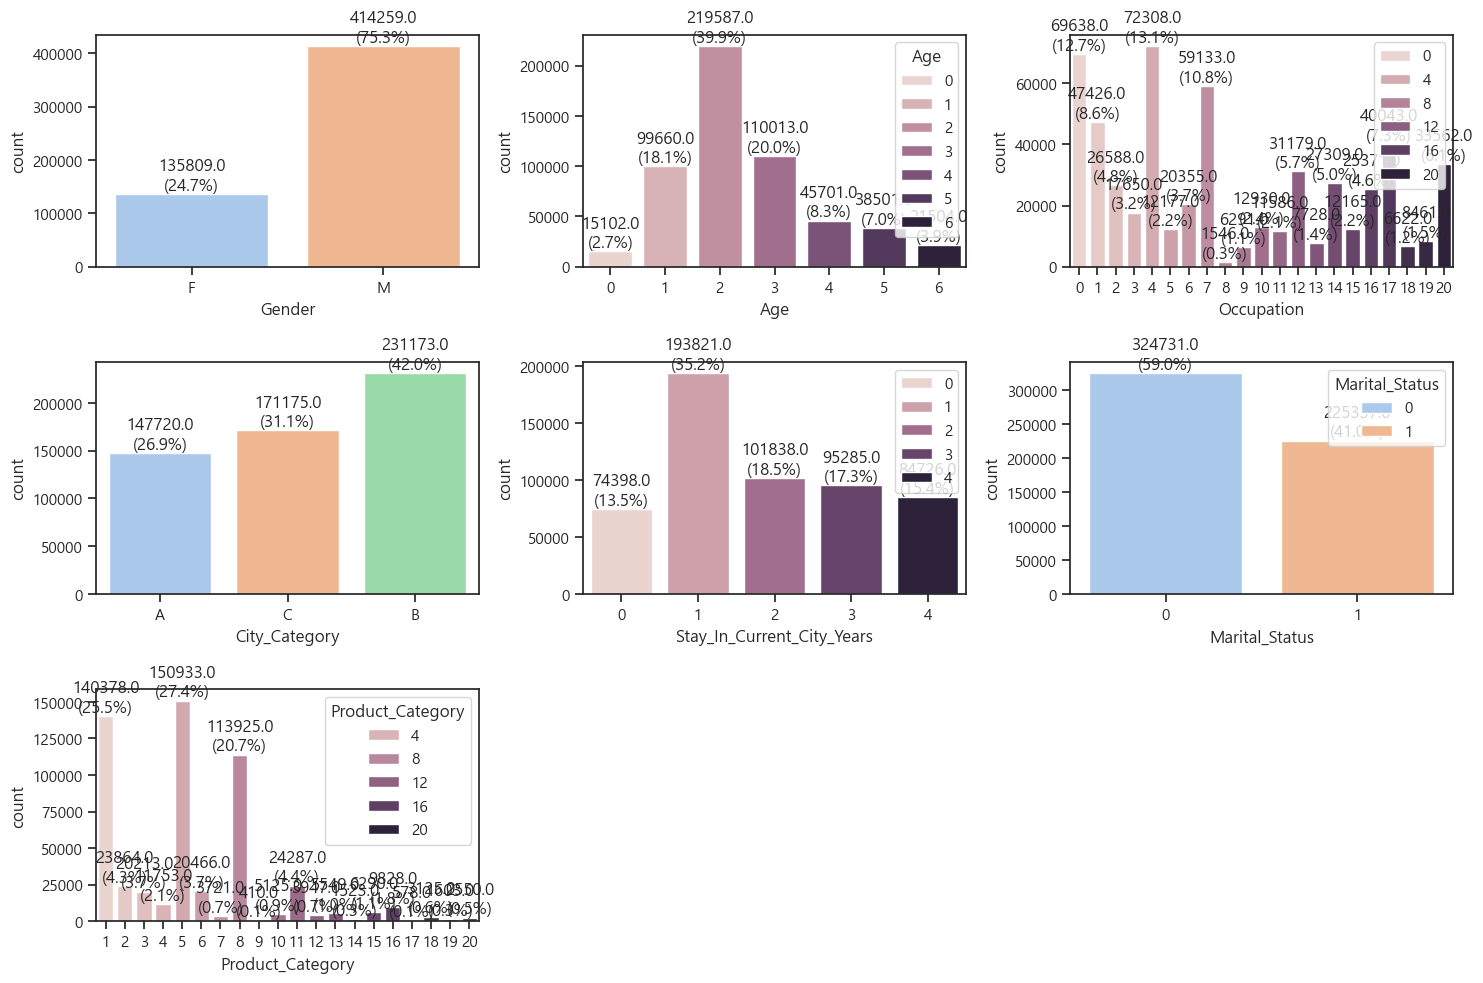

In [73]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data=df, x='Gender', hue='Gender', ax=ax[0, 0])  
sns.countplot(data=df, x='Age', hue='Age', ax=ax[0, 1])  
sns.countplot(data=df, x='Occupation', hue='Occupation', ax=ax[0, 2])  
ax[0, 2].legend(loc='upper right')
sns.countplot(data=df, x='City_Category', hue='City_Category', ax=ax[1, 0])  
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Stay_In_Current_City_Years', ax=ax[1, 1])
ax[1, 1].legend(loc='upper right')
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', ax=ax[1, 2])  
sns.countplot(data=df, x='Product_Category', hue='Product_Category', ax=ax[2, 0])  

for i in range(len(ax)):
    for j in range(len(ax[i])):
        for p in ax[i, j].patches:
            height = p.get_height()
            if height > 0:
                ratio = height / len(df) * 100 
                ax[i, j].annotate(f'{height}\n({ratio:.1f}%)', 
                                  (p.get_x() + p.get_width() / 2., height), 
                                  ha='center', va='bottom')

fig.delaxes(ax[2, 1])  
fig.delaxes(ax[2, 2]) 

plt.tight_layout()
plt.show()

## 상관계수

### Gender_F와 Gender_M : -1, 성별이 여성인 경우에는 남성으로 간주되지 않으며, 반대도 마찬가지<br>

### City_Category_B와 City_Category_A: -0.515898, A 도시와 B 도시가 서로 배타적일 수 있음
### City_Category_C와 City_Category_A : -0.407268 , A 도시와 C 도시가 서로 배타적일 수 있음
### 도시별 고객의 구매 성향이 다르므로, 지역 맞춤형 전략이 필요!!<br>

### Age와 Marital_Status : 나이에 따라 결혼 상태가 영향을 받을 수 있음
### 나이가 많을수록 기혼자가 많아질 가능성 있음

### Product_Category와 Purchase : -0.343703, 특정 카테고리에서는 구매가 줄어들 수 있음
### 특정 카테고리에서 구매가 감소하면, 전체적인 구매 금액이 줄어드는 경향이 있다는 것


<Axes: >

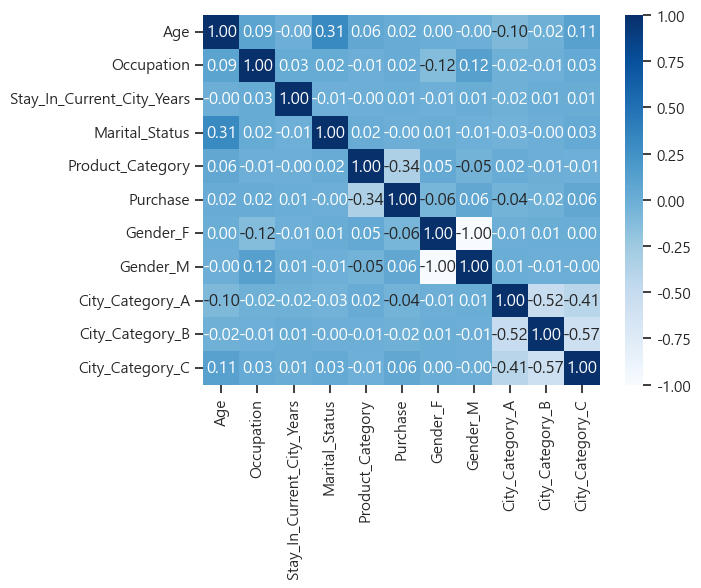

In [22]:
df_corr = df_encoded.corr()
sns.heatmap(df_corr, fmt='.2f', annot=True, cmap='Blues')

In [80]:
df_corr

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
Age,1.000000,0.091463,-0.004712,0.311738,0.061197,0.015839,0.004262,-0.004262,-0.095561,-0.017950,0.110616
Occupation,0.091463,1.000000,0.030005,0.024280,-0.007618,0.020833,-0.117291,0.117291,-0.023070,-0.011673,0.034529
Stay_In_Current_City_Years,-0.004712,0.030005,1.000000,-0.012819,-0.004213,0.005422,-0.014660,0.014660,-0.023236,0.011008,0.010507
Marital_Status,0.311738,0.024280,-0.012819,1.000000,0.019888,-0.000463,0.011603,-0.011603,-0.033088,-0.001863,0.033661
Product_Category,0.061197,-0.007618,-0.004213,0.019888,1.000000,-0.343703,0.045594,-0.045594,0.015702,-0.006076,-0.008554
Purchase,0.015839,0.020833,0.005422,-0.000463,-0.343703,1.000000,-0.060346,0.060346,-0.042465,-0.019098,0.061012
Gender_F,0.004262,-0.117291,-0.014660,0.011603,0.045594,-0.060346,1.000000,-1.000000,-0.007299,0.006155,0.000426
Gender_M,-0.004262,0.117291,0.014660,-0.011603,-0.045594,0.060346,-1.000000,1.000000,0.007299,-0.006155,-0.000426
City_Category_A,-0.095561,-0.023070,-0.023236,-0.033088,0.015702,-0.042465,-0.007299,0.007299,1.000000,-0.515898,-0.407268
City_Category_B,-0.017950,-0.011673,0.011008,-0.001863,-0.006076,-0.019098,0.006155,-0.006155,-0.515898,1.000000,-0.572277


In [88]:
df_encoded.columns

Index(['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Purchase', 'Gender_F', 'Gender_M',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [146]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## City_Category 분석
### 도시별 인기상품 : 1,5,8 상품이 압도적으로 많고, 2,3,4,6,11이 그 다음
### 도시별 구매금액 : 도시별로 고객들은 비슷한 소비패턴을 가짐
### C도시와 다르게 A,B도시는 이상치가 많은데, 이는 도시 A,B에는 고소득 소비자들이 고급 제품에 대한 수요가 높다는 것을 의미
### C도시는 소비패턴이 전반적으로 안정적

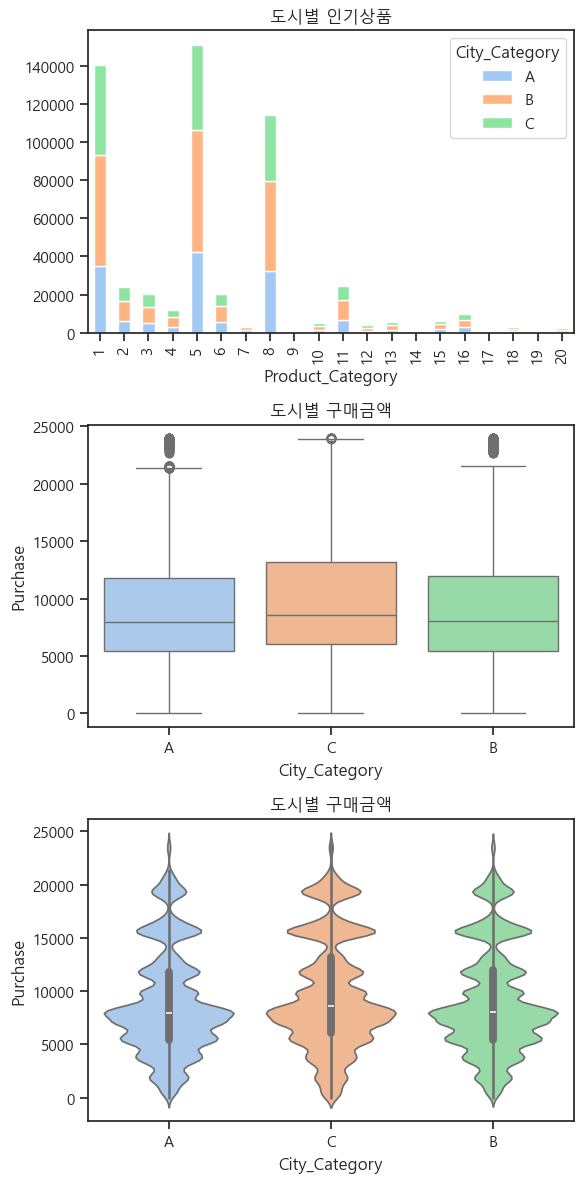

In [193]:
subset = df[['City_Category','Product_Category','Purchase']]
count_data = subset.groupby(['Product_Category', 'City_Category']).size().unstack(fill_value=0)

fig, ax = plt.subplots(3,1,figsize=(6,12))

count_data.plot(kind='bar', stacked=True, ax=ax[0])
sns.boxplot(data=subset, x='City_Category', y='Purchase', hue='City_Category', ax=ax[1])
sns.violinplot(data=subset, x='City_Category', y='Purchase', hue='City_Category', ax=ax[2])

ax[0].set_title('도시별 인기상품')
ax[1].set_title('도시별 구매금액')
ax[2].set_title('도시별 구매금액')

plt.tight_layout()
plt.show()

In [255]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [263]:
print(df['Purchase'].dtype)

int64


In [265]:
for city in df['City_Category'].unique():
    city_purchase = df[df['City_Category'] == city]['Purchase']
    outliers = outlier(city_purchase)
    outlier_ratio = outliers.shape[0] / city_purchase.shape[0] * 100 if city_purchase.shape[0] > 0 else 0
    
    print(f"{city}의 이상치 비율: {outlier_ratio:.2f}%")

A의 이상치 비율: 0.48%
C의 이상치 비율: 0.01%
B의 이상치 비율: 0.40%


In [ ]:
outlier_df = df[(df['Purchase'] < (df['Purchase'].quantile(0.25) - 1.5 * (df['Purchase'].quantile(0.75) - df['Purchase'].quantile(0.25))) ) |
                 (df['Purchase'] > (df['Purchase'].quantile(0.75) + 1.5 * (df['Purchase'].quantile(0.75) - df['Purchase'].quantile(0.25))) )]

## gender 분석

### 성별별 구매 금액 : 여성(1.54%)이 남성(0.44%)보다 구매금액 이상치가 많음
### 성별별 구매 빈도 : 데이터 분포가 여러 피크를 가지므로 다양한 소비패턴이 있음을 확인
### 성별별 선호 제품 카테고리 : 상품 1,5,8에서 남성 여성 모두 강한 선호를 보였고, 2,3,6,11,이 그 뒤를 이음

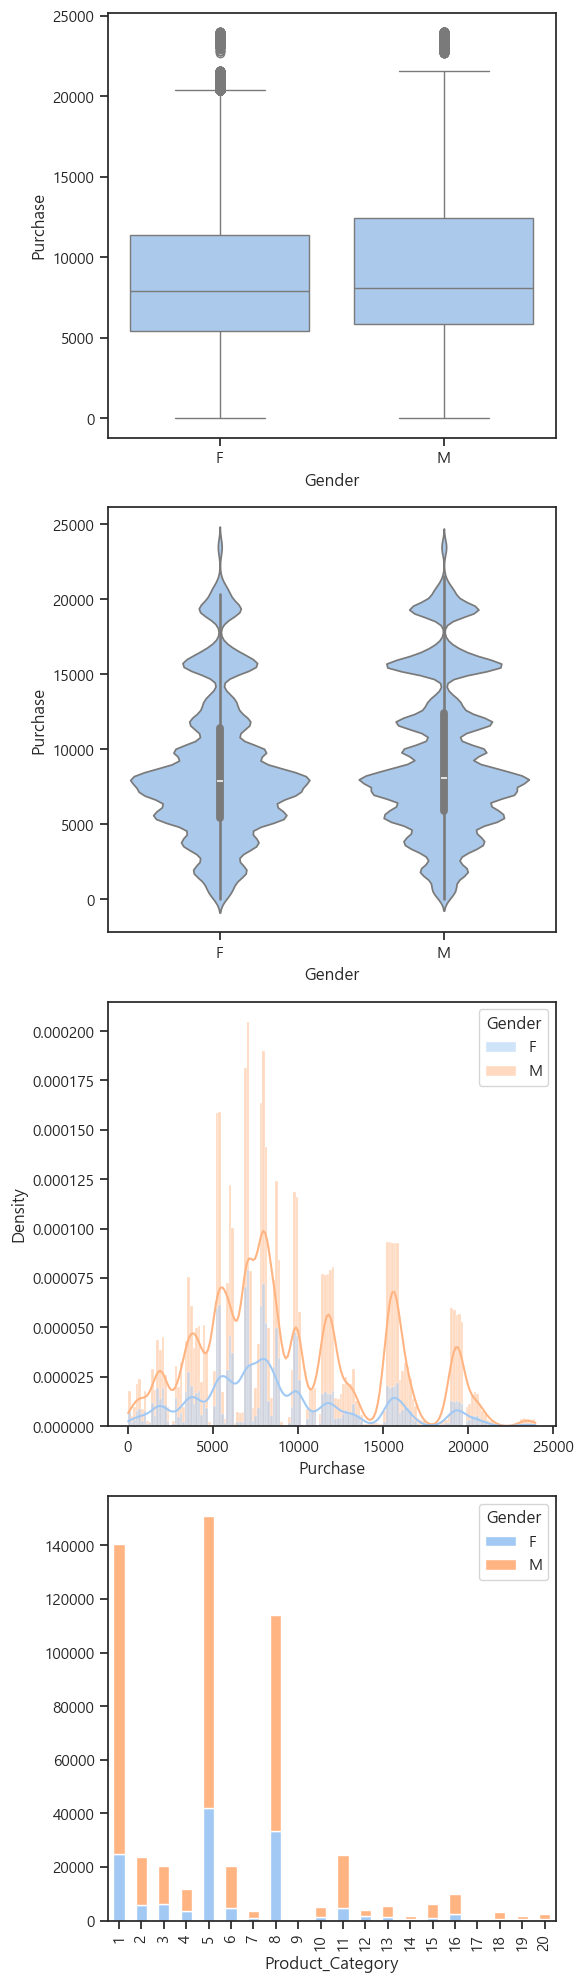

In [267]:
subset = df[['Gender', 'Product_Category', 'Purchase']]
count_data = df.groupby(['Product_Category', 'Gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(4,1,figsize=(6,20))

sns.boxplot(data=subset, x='Gender', y='Purchase', ax=ax[0])
sns.violinplot(data=subset, x='Gender', y='Purchase', ax=ax[1])

sns.histplot(data=subset, x='Purchase', hue='Gender', kde=True, stat='density', ax=ax[2])

count_data.plot(kind='bar', stacked=True, ax=ax[3])

plt.tight_layout()
plt.show()

In [61]:
for gender in df['Gender'].unique():
    gender_purchase = df[df['Gender'] == gender]['Purchase']
    outliers = outlier(gender_purchase)
    outlier_ratio = outliers.shape[0] / gender_purchase.shape[0] * 100 if gender_purchase.shape[0] > 0 else 0
    
    print(f"{gender}의 이상치 비율: {outlier_ratio:.2f}%")
    print(f"{gender}의 이상치 개수: {len(outliers)}개")

F의 이상치 비율: 1.52%
F의 이상치 개수: 2065개
M의 이상치 비율: 0.44%
M의 이상치 개수: 1812개


## Product_Category, Purchase 분석
### 각 제품 카테고리별 구매 금액
### 각 제품 카테고리별 구매 빈도<br>

1. 구매 금액도 높고, 구매 빈도도 높은 상품 1의 경우, 인기 상품이며 매출 비중이 높은 핵심 제품임
- 고가 제품의 경우, 고객 만족도에 신경을 써야함<br>

2. 구매 금액은 낮고, 구매 빈도는 높은 상품 5,8,11의 경우, 낮은 가격대의 상품이 여러번 소비되었다는 의미
- 소비자들이 자주 찾는 일상 소모품이며, 반복 구매가 빈번하므로 재고관리에 신경을 써야함
- 프로모션을 통해 구매 빈도를 높이는 전략<br>

3. 구매 금액과 구매 빈도가 비슷한 상품 2,3의 경우, 균일한 가격대를 가진 제품군일 가능성이 높음
- 고정적인 수요가 있을 수 있음<br>

4. 구매 금액은 높지만 구매 빈도가 낮은 상품 6의 경우, 고가의 고급 제품일 확률 있음
- 주기적으로 구매되지만 정기적인 소비는 아닌 경우가 많음

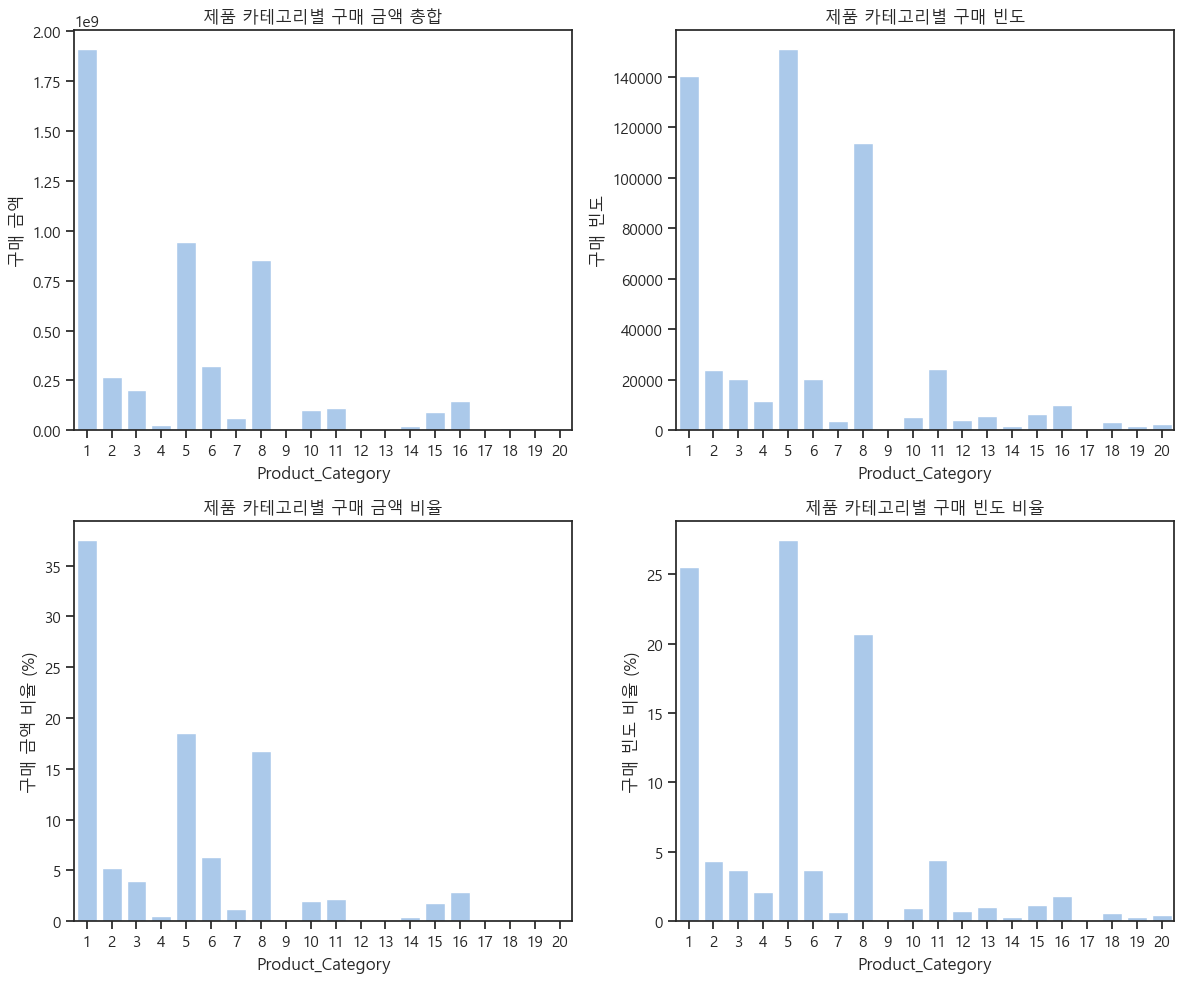

In [277]:
subset = df[['Product_Category','Purchase']]

purchase_sum = subset.groupby('Product_Category')['Purchase'].sum()
purchase_count = subset.groupby('Product_Category').size()

# 비율
total_sum = purchase_sum.sum()
total_count = purchase_count.sum()

purchase_sum_percentage = (purchase_sum / total_sum) * 100
purchase_count_percentage = (purchase_count / total_count) * 100

fig, ax = plt.subplots(2,2,figsize=(12,10))

sns.barplot(x=purchase_sum.index, y=purchase_sum.values, ax=ax[0, 0])
ax[0, 0].set_title('제품 카테고리별 구매 금액 총합')
ax[0, 0].set_ylabel('구매 금액')

sns.barplot(x=purchase_count.index, y=purchase_count.values, ax=ax[0, 1])
ax[0, 1].set_title('제품 카테고리별 구매 빈도')
ax[0, 1].set_ylabel('구매 빈도')

sns.barplot(x=purchase_sum_percentage.index, y=purchase_sum_percentage.values, ax=ax[1, 0])
ax[1, 0].set_title('제품 카테고리별 구매 금액 비율')
ax[1, 0].set_ylabel('구매 금액 비율 (%)')

sns.barplot(x=purchase_count_percentage.index, y=purchase_count_percentage.values, ax=ax[1, 1])
ax[1, 1].set_title('제품 카테고리별 구매 빈도 비율')
ax[1, 1].set_ylabel('구매 빈도 비율 (%)')

plt.tight_layout()
plt.show()

## Age & Product_Category & Purchase 분석
### 연령대별 선호하는 제품과 구매 패턴
### 제품 1,5,8이 인기가 많았고, 2,3,6,11이 뒤를 이음
### 물품당 구매율 60%정도가 26-45세 사이임
### 51~55세 연령대 소비자들이 물품 11을 선호함
### 18~25세 연령대 소비자들은 물품 3을 선호함
### 36세 이상 연령대는 이상치비율이 다른 연령대에 비해 높은데 고가의 제품을 소비한다는 것을 알 수 있음

In [43]:
age_mapping = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

df['Age'].value_counts()

Age
2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: count, dtype: int64

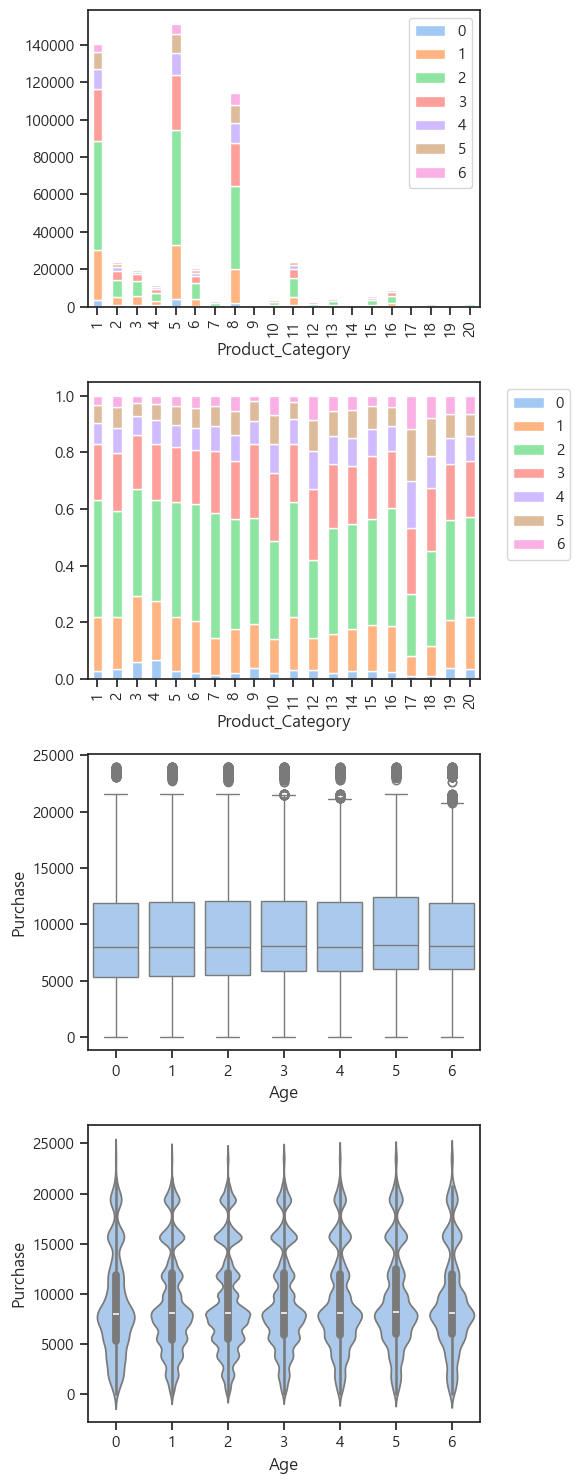

In [48]:
subset = df[['Age','Product_Category','Purchase']]
age_product = subset.groupby(['Product_Category', 'Age']).size().unstack(fill_value=0)
age_product_ratio = age_product.div(age_product.sum(axis=1), axis=0)

fig, ax = plt.subplots(4,1,figsize=(6,15))

age_product.plot(kind='bar', stacked=True, ax=ax[0])
age_product_ratio.plot(kind='bar', stacked=True, ax=ax[1])
ax[0].legend(bbox_to_anchor=(1,1))
ax[1].legend(bbox_to_anchor=(1.05,1))
sns.boxplot(data=subset, x='Age', y='Purchase',ax=ax[2])
sns.violinplot(data=subset, x='Age', y='Purchase',ax=ax[3])

plt.tight_layout()
plt.show()

In [58]:
for age in df['Age'].unique():
    age_purchase = df[df['Age'] == age]['Purchase']
    outliers = outlier(age_purchase)
    outlier_ratio = outliers.shape[0] / age_purchase.shape[0] * 100 if age_purchase.shape[0] > 0 else 0
    
    print(f"{age}의 이상치 비율: {outlier_ratio:.2f}%")
    print(f"{age}의 이상치 개수: {len(outliers)}개")

0의 이상치 비율: 0.37%
0의 이상치 개수: 56개
6의 이상치 비율: 1.16%
6의 이상치 개수: 250개
2의 이상치 비율: 0.37%
2의 이상치 개수: 816개
4의 이상치 비율: 0.66%
4의 이상치 개수: 303개
5의 이상치 비율: 0.72%
5의 이상치 개수: 278개
3의 이상치 비율: 0.53%
3의 이상치 개수: 586개
1의 이상치 비율: 0.26%
1의 이상치 개수: 262개


## 성별, 연령대, 도시, 핵심 제품별 마케팅 전략
1. 성별
2. 연령대
3. 도시
4. 핵심 제품
- 핵심제품(1) : 매출 비중이 높으므로 집중적인 마케팅 및 재고 관리
- 저가제품(5,8,11) : 반복 구매가 많으므로, 구매 빈도를 높이기 위한 전략
- 균일한 가격대 제품(2,3) : 가격대가 비슷하다는 것은 소비자들이 서로 비교하며 구매할 가능성이 높으므로 가격 경쟁력을 강조하는 마케팅
  - 제품2, 3을 함께 묶어 판매하는 패키지 할인 프로모션을 통해 소비 유도
  - 특정 소비층을 겨냥한 프로모션 전략
- 고급제품(6) : 고객 만족도 향상을 위한 고객 피드백 수집 및 품질 관리 강화